<a href="https://colab.research.google.com/github/The-begining/sentimentAnalysis_amazonreview/blob/main/notebook78babec1f2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-review-raw-cleaned-dataset/training_set_cleaned.csv
/kaggle/input/amazon-review-raw-cleaned-dataset/test_dataset_cleaned.csv


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0


In [ ]:
!which nvcc


/opt/conda/bin/nvcc


In [ ]:
import numpy as np
import pandas as pd
import re
#from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.optimizers import SGD, Adam
#import bz2
import csv
from sklearn.metrics import roc_auc_score

In [ ]:
train_dataset = pd.read_csv('/kaggle/input/amazon-review-raw-cleaned-dataset/training_set_cleaned.csv')
test_datset =pd.read_csv('/kaggle/input/amazon-review-raw-cleaned-dataset/test_dataset_cleaned.csv')

In [ ]:
train_dataset.shape, test_datset.shape

((2400000, 3), (519999, 3))

In [ ]:
train_dataset['Sentiments'] = train_dataset['Sentiments'].astype(int)
test_datset['Sentiments'] = test_datset['Sentiments'].astype(int)

train_dataset['text'] = train_dataset['text'].astype(str).fillna('')
test_datset['text'] = test_datset['text'].astype(str).fillna('')

In [ ]:
# Extract the text and labels
train_texts = train_dataset['text'].tolist()
train_labels = train_dataset['Sentiments'].tolist()

test_texts = test_datset['text'].tolist()
test_labels = test_datset['Sentiments'].tolist()

In [ ]:
# Tokenization and Padding
max_words = 1000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

In [ ]:
# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(train_labels)
y_test = np.array(test_labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400000, 100), (519999, 100), (2400000,), (519999,))

In [ ]:
#create the  model

model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = 128))
model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(rate = 0.2))
model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))

# Print the model summary
model.build(input_shape=(None, max_sequence_length))
# Compile the model
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 128)       │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 391,297 (1.49 MB)

 Trainable params: 391,297 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train.shape, y_train.shape

((2400000, 100), (2400000,))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=2048, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 196s 166ms/step - accuracy: 0.9183 - loss: 0.2034 - val_accuracy: 0.9163 - val_loss: 0.2082
Epoch 2/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 194s 165ms/step - accuracy: 0.9212 - loss: 0.1973 - val_accuracy: 0.9171 - val_loss: 0.2062
Epoch 3/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 193s 165ms/step - accuracy: 0.9236 - loss: 0.1917 - val_accuracy: 0.9189 - val_loss: 0.2031
Epoch 4/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 194s 165ms/step - accuracy: 0.9259 - loss: 0.1867 - val_accuracy: 0.9186 - val_loss: 0.2038
Epoch 5/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 193s 165ms/step - accuracy: 0.9280 - loss: 0.1816 - val_accuracy: 0.9197 - val_loss: 0.2015
Epoch 6/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 194s 165ms/step - accuracy: 0.9301 - loss: 0.1778 - val_accuracy: 0.9212 - val_loss: 0.1984
Epoch 7/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 194s 165ms/step - accuracy: 0.9321 - loss: 0.1733 - val_accuracy: 0.9212 - val_loss: 0.1994
Epoch 8/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 194s 165ms/s

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

In [ ]:
# Extract the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

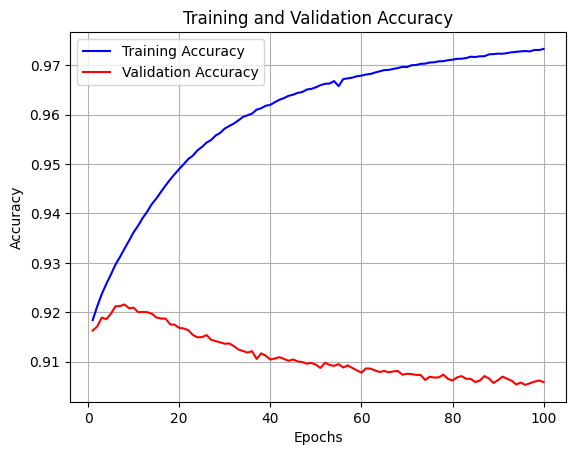

In [ ]:
# Plot the accuracy over epochs
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

16250/16250 ━━━━━━━━━━━━━━━━━━━━ 68s 4ms/step - accuracy: 0.9045 - loss: 0.3675
Loss:  0.36275479197502136
Accuracy:  0.9058517217636108


In [ ]:
prediction = model.predict(X_test)
y_pred = np.where(prediction>=.5, 1, 0)
df = pd.DataFrame()
df['actual'],df['pred'] = y_test, y_pred

16250/16250 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step


array([[235709,  24290],
       [ 24667, 235333]])

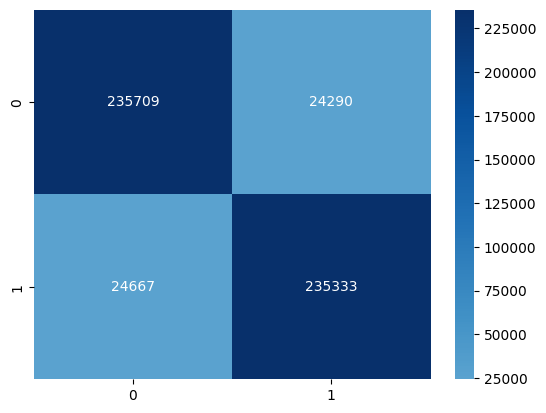

In [ ]:
import seaborn as sns
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM, annot = True, center = True, fmt = 'g', cmap = 'Blues')
CM


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91    259999
           1       0.91      0.91      0.91    260000

    accuracy                           0.91    519999
   macro avg       0.91      0.91      0.91    519999
weighted avg       0.91      0.91      0.91    519999



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
X_train.shape, y_train.shape

((2400000, 100), (2400000,))

In [ ]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=2048, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])